In [1]:
from scripts.utils import *
from scripts.embedding_fabric import EmbeddingFabric
from scripts.indexer import Indexer
from scripts.metrics import *
from scripts.model import *
from scripts.training_model import *
from scripts.visual_util import *

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
TRAIN_PATH = 'data/train.txt'
DEV_PATH = 'data/dev.txt'
TEST_PATH = 'data/test.txt'
EMBEDDINGS_PATH = 'embeddings/glove.6B.100d.txt'

In [4]:
glove = load_embedding_dict(EMBEDDINGS_PATH)

100%|██████████| 400000/400000 [00:06<00:00, 64398.84it/s]


In [5]:
words, tags = read_ner_data_from_connl(TRAIN_PATH)

In [6]:
val_words, val_tags = read_ner_data_from_connl(DEV_PATH)

In [7]:
test_words, test_tags = read_ner_data_from_connl(TEST_PATH)

In [8]:
data_dict = {
    'train': (words, tags),
    'dev': (val_words, val_tags),
    'test': (test_words, test_tags)
}

In [9]:
words_indexer = Indexer(words)
tags_indexer = Indexer(tags)

In [10]:
EMBEDDING_DIM = 100
HIDDEN_DIM = 100

In [11]:
models = {}

In [12]:
for strat in ['a', 'b', 'c']:
    strategy = f"strategy_{strat}"
    model = LSTMTagger(EMBEDDING_DIM, HIDDEN_DIM,
                   tags_indexer.size(), 
                   lambda: EmbeddingFabric.get_embedding_layer(words_indexer, glove, strategy))
    
    models[strategy] = model

In [13]:
labels = [x for x in tags_indexer.get_element_to_index_dict().values()]

In [14]:
plotting_data = {}
trained_models = {}

In [15]:
for name, model in models.items():
    print(f"Training {name} model")
    loss_function = nn.NLLLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.1)
    
    metric_handler = MetricsHandler(labels)
    valid_metric = MetricsHandler(labels)
    
    model, train, valid, losses = train_model(model, optimizer,
                                  loss_function,
                                  data_dict, 
                                  128, #batch size 
                                  words_indexer, 
                                  tags_indexer, 
                                  metric_handler, 
                                  valid_metric,
                                  num_epochs=5)
    
    plotting_data[name] = (train.get_metrics(), losses, valid.get_metrics())

Training strategy_a model


/raid/data/tang/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch 1/5
----------


100%|██████████| 1591/1591 [00:40<00:00, 38.83it/s]
/raid/data/tang/pytorch_ner/scripts/metrics.py:9: RuntimeWarning: invalid value encountered in scalar divide
  return x[1, 1] / (x[1, 0] + x[1, 1])
/raid/data/tang/pytorch_ner/scripts/metrics.py:15: RuntimeWarning: invalid value encountered in scalar divide
  return ((1 + beta**2)*precision*recall)/(beta**2 * precision + recall)


Loss per epoch - 58.138879916302294
Precision - 0.2624661589997643
Recall - 0.21329764362755294
F1-score - 0.3478915361986035
F0.5-score - 0.3859509133231674

Validating on dev test: 


/raid/data/tang/pytorch_ner/scripts/metrics.py:5: RuntimeWarning: invalid value encountered in scalar divide
  return x[1, 1]/(x[1, 1] + x[0, 1])


Precision - 0.44773061112792584
Recall - 0.3073695684365944
F1-score - 0.512260456322835
F0.5-score - 0.46769808404639046


Epoch 2/5
----------


100%|██████████| 1591/1591 [00:41<00:00, 38.46it/s]


Loss per epoch - 46.858570159212135
Precision - 0.4344606123832296
Recall - 0.3561279924814156
F1-score - 0.4098206128210415
F0.5-score - 0.42764149409326535

Validating on dev test: 
Precision - 0.47404571816263247
Recall - 0.3581703133966937
F1-score - 0.4598320908927473
F0.5-score - 0.470042127075257


Epoch 3/5
----------


100%|██████████| 1591/1591 [00:41<00:00, 38.78it/s]


Loss per epoch - 41.60097294699314
Precision - 0.5214182198024967
Recall - 0.4174057570898321
F1-score - 0.48384380679988237
F0.5-score - 0.5042700824201735

Validating on dev test: 
Precision - 0.5013342341984414
Recall - 0.40420067029367446
F1-score - 0.4287527755018607
F0.5-score - 0.45003828814234315


Epoch 4/5
----------


100%|██████████| 1591/1591 [00:39<00:00, 40.51it/s]


Loss per epoch - 38.780611412741344
Precision - 0.5644264868117331
Recall - 0.4510821722713206
F1-score - 0.4711883312795125
F0.5-score - 0.49910709943506926

Validating on dev test: 
Precision - 0.4958920725848727
Recall - 0.43834358728823936
F1-score - 0.46951535497832103
F0.5-score - 0.47794234048647727


Epoch 5/5
----------


100%|██████████| 1591/1591 [00:39<00:00, 40.78it/s]


Loss per epoch - 35.95227483534948
Precision - 0.5910836418631388
Recall - 0.487824117312526
F1-score - 0.5094306836016038
F0.5-score - 0.5374667624223182

Validating on dev test: 
Precision - 0.49805903409272567
Recall - 0.4748336302605111
F1-score - 0.4440643758782588
F0.5-score - 0.44629661424045886


Training strategy_b model
Epoch 1/5
----------


100%|██████████| 1591/1591 [00:39<00:00, 40.60it/s]


Loss per epoch - 59.21943440786103
Precision - 0.5821707310089248
Recall - 0.2665827141254229
F1-score - 0.38973238848953196
F0.5-score - 0.4555959654992175

Validating on dev test: 
Precision - 0.7394665869066829
Recall - 0.40661427224376834
F1-score - 0.5799652553926821
F0.5-score - 0.647615122196494


Epoch 2/5
----------


100%|██████████| 1591/1591 [00:44<00:00, 35.55it/s]


Loss per epoch - 32.61214117116706
Precision - 0.7219783174485177
Recall - 0.5325169769382003
F1-score - 0.5668362410542344
F0.5-score - 0.6084779836119611

Validating on dev test: 
Precision - 0.8146078611956301
Recall - 0.5304067536174013
F1-score - 0.5919260834277689
F0.5-score - 0.6570899336016383


Epoch 3/5
----------


100%|██████████| 1591/1591 [00:41<00:00, 38.08it/s]


Loss per epoch - 24.490232514260814
Precision - 0.8075828600768715
Recall - 0.662752511987898
F1-score - 0.7125614200172721
F0.5-score - 0.7595307357964134

Validating on dev test: 
Precision - 0.8248857889087187
Recall - 0.6142611730351528
F1-score - 0.6837026423529147
F0.5-score - 0.7512711084199805


Epoch 4/5
----------


100%|██████████| 1591/1591 [00:44<00:00, 35.43it/s]


Loss per epoch - 20.83180920044013
Precision - 0.8325401112630185
Recall - 0.719521112169859
F1-score - 0.7635997562833343
F0.5-score - 0.8003252988435363

Validating on dev test: 
Precision - 0.8379549591420693
Recall - 0.649612495922185
F1-score - 0.7156582948405236
F0.5-score - 0.7771252394328437


Epoch 5/5
----------


100%|██████████| 1591/1591 [00:57<00:00, 27.74it/s]


Loss per epoch - 18.604188044057334
Precision - 0.8482816070378456
Recall - 0.7503893410374395
F1-score - 0.790202031744148
F0.5-score - 0.8218656360795972

Validating on dev test: 
Precision - 0.8501273548418131
Recall - 0.6699456286737169
F1-score - 0.735661290588964
F0.5-score - 0.7946024699639848


Training strategy_c model
Epoch 1/5
----------


100%|██████████| 1591/1591 [00:40<00:00, 39.64it/s]


Loss per epoch - 59.042324250436366
Precision - 0.505687095276526
Recall - 0.27303217313426514
F1-score - 0.39614495295033275
F0.5-score - 0.4555386687212327

Validating on dev test: 
Precision - 0.7487638372395822
Recall - 0.4012561360368585
F1-score - 0.5625388730397118
F0.5-score - 0.6206145683689073


Epoch 2/5
----------


100%|██████████| 1591/1591 [00:39<00:00, 40.57it/s]


Loss per epoch - 32.875240699444866
Precision - 0.7508481759501154
Recall - 0.5348415549496977
F1-score - 0.5669923644336164
F0.5-score - 0.6063881897781978

Validating on dev test: 
Precision - 0.7869543059360065
Recall - 0.5314161281526595
F1-score - 0.5939671364712488
F0.5-score - 0.6604251745753003


Epoch 3/5
----------


100%|██████████| 1591/1591 [00:39<00:00, 40.38it/s]


Loss per epoch - 25.104454103616106
Precision - 0.7999777072175577
Recall - 0.6534238134765968
F1-score - 0.7005971020032733
F0.5-score - 0.7472581521210564

Validating on dev test: 
Precision - 0.8393167807927379
Recall - 0.6140659780270515
F1-score - 0.6842587031614699
F0.5-score - 0.7547503387147345


Epoch 4/5
----------


100%|██████████| 1591/1591 [00:49<00:00, 32.09it/s]


Loss per epoch - 21.461254826589418
Precision - 0.8273728689905127
Recall - 0.7146984999590452
F1-score - 0.7572389351720032
F0.5-score - 0.7938262363119081

Validating on dev test: 
Precision - 0.8458774381112535
Recall - 0.6455352288553784
F1-score - 0.7136664025951427
F0.5-score - 0.7785257921006937


Epoch 5/5
----------


100%|██████████| 1591/1591 [00:42<00:00, 37.63it/s]


Loss per epoch - 19.16834511588451
Precision - 0.843006127056985
Recall - 0.7437422603792598
F1-score - 0.7830850531039646
F0.5-score - 0.8152756073554814

Validating on dev test: 
Precision - 0.8567589396719816
Recall - 0.6650649765484191
F1-score - 0.7338419961834834
F0.5-score - 0.7964121352879674




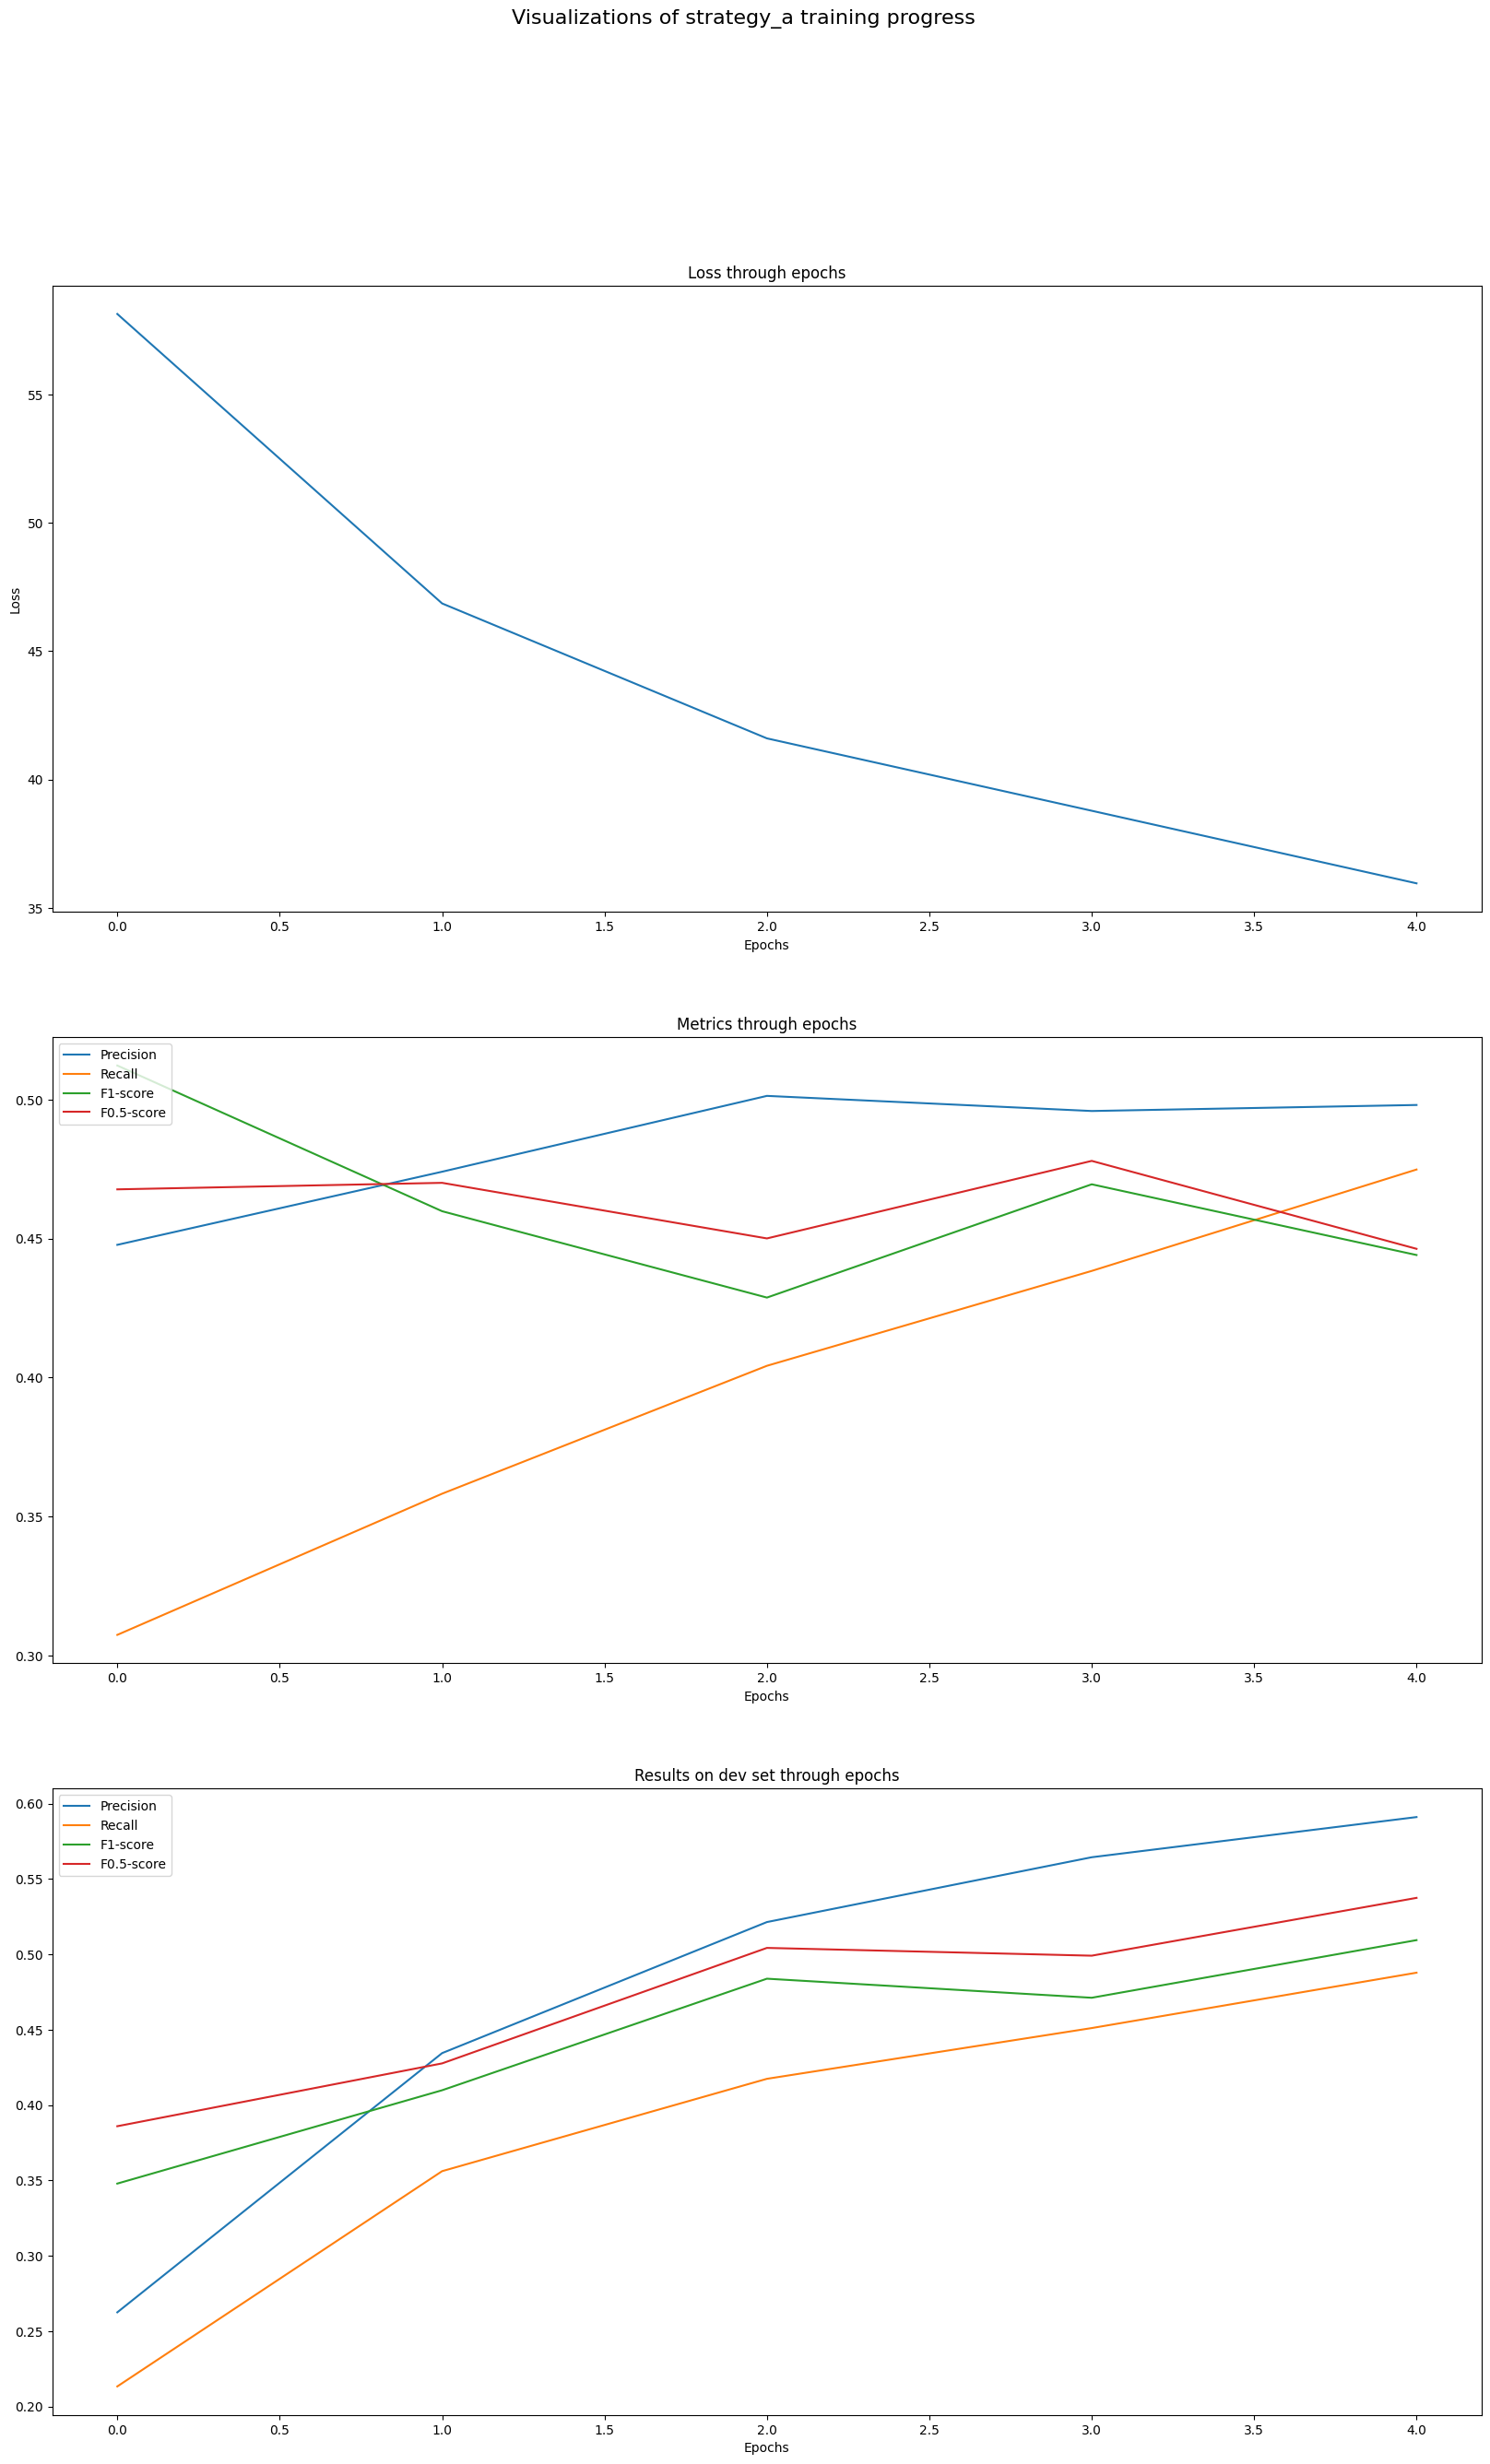

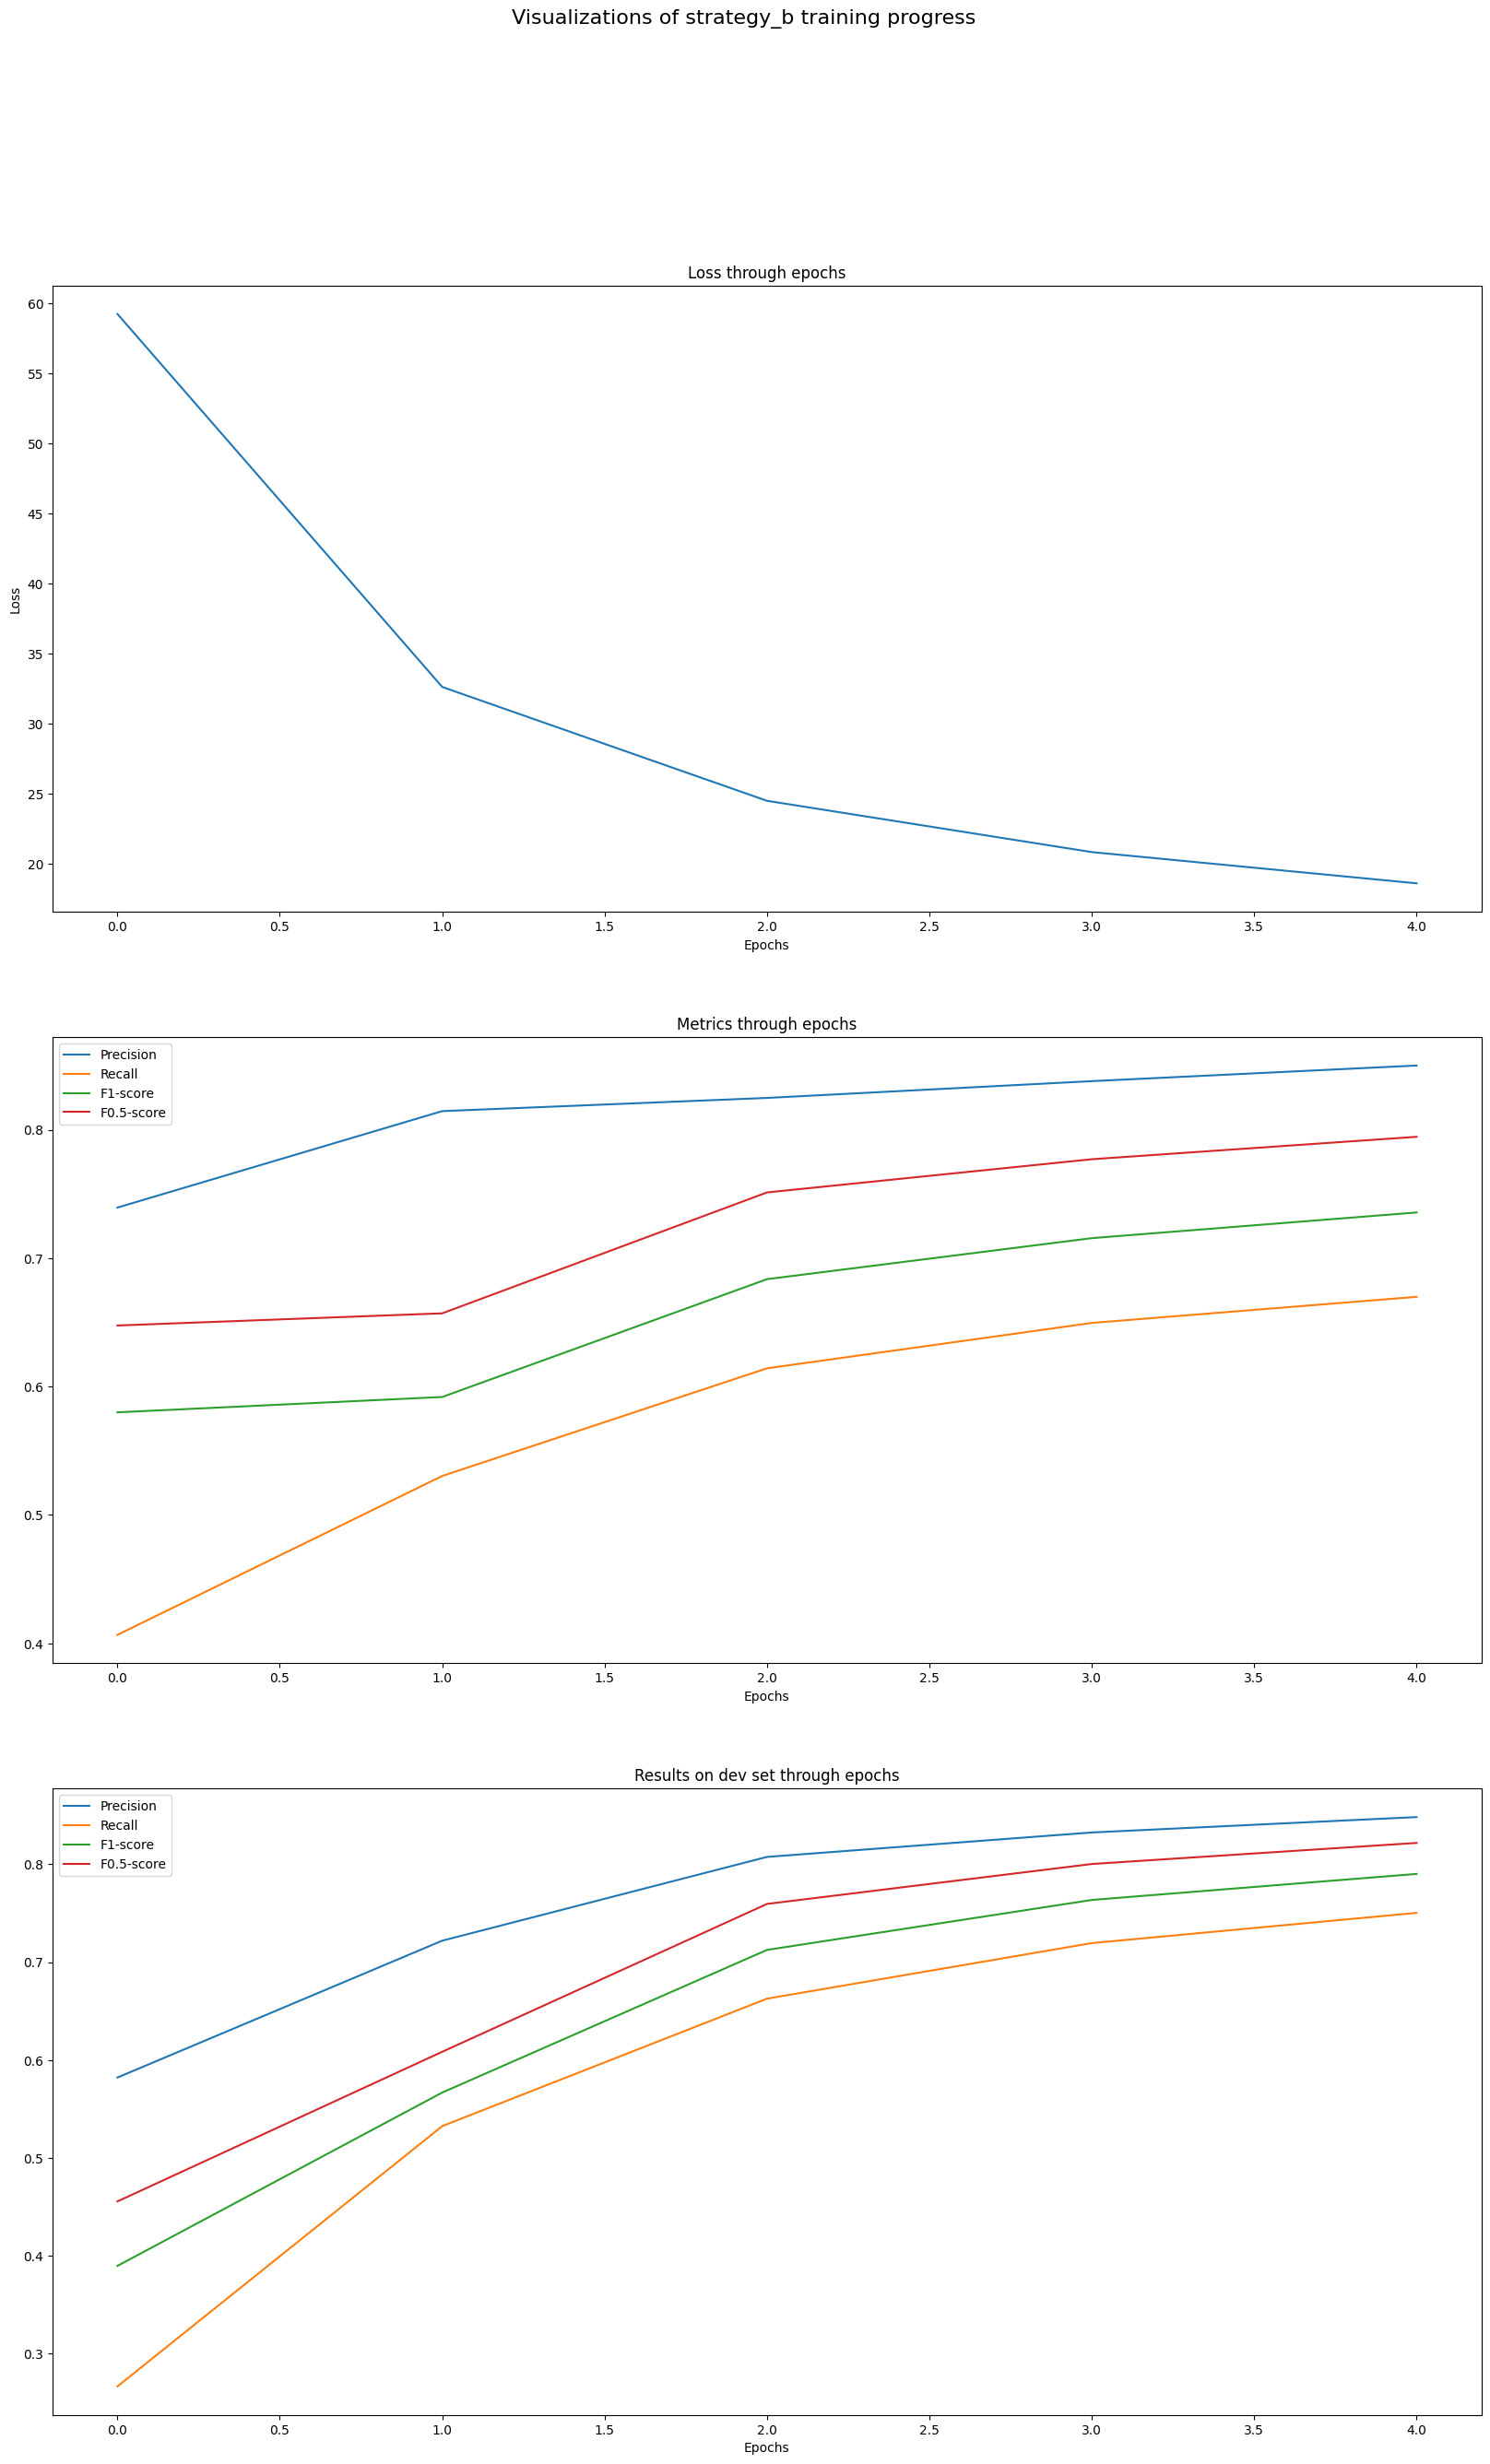

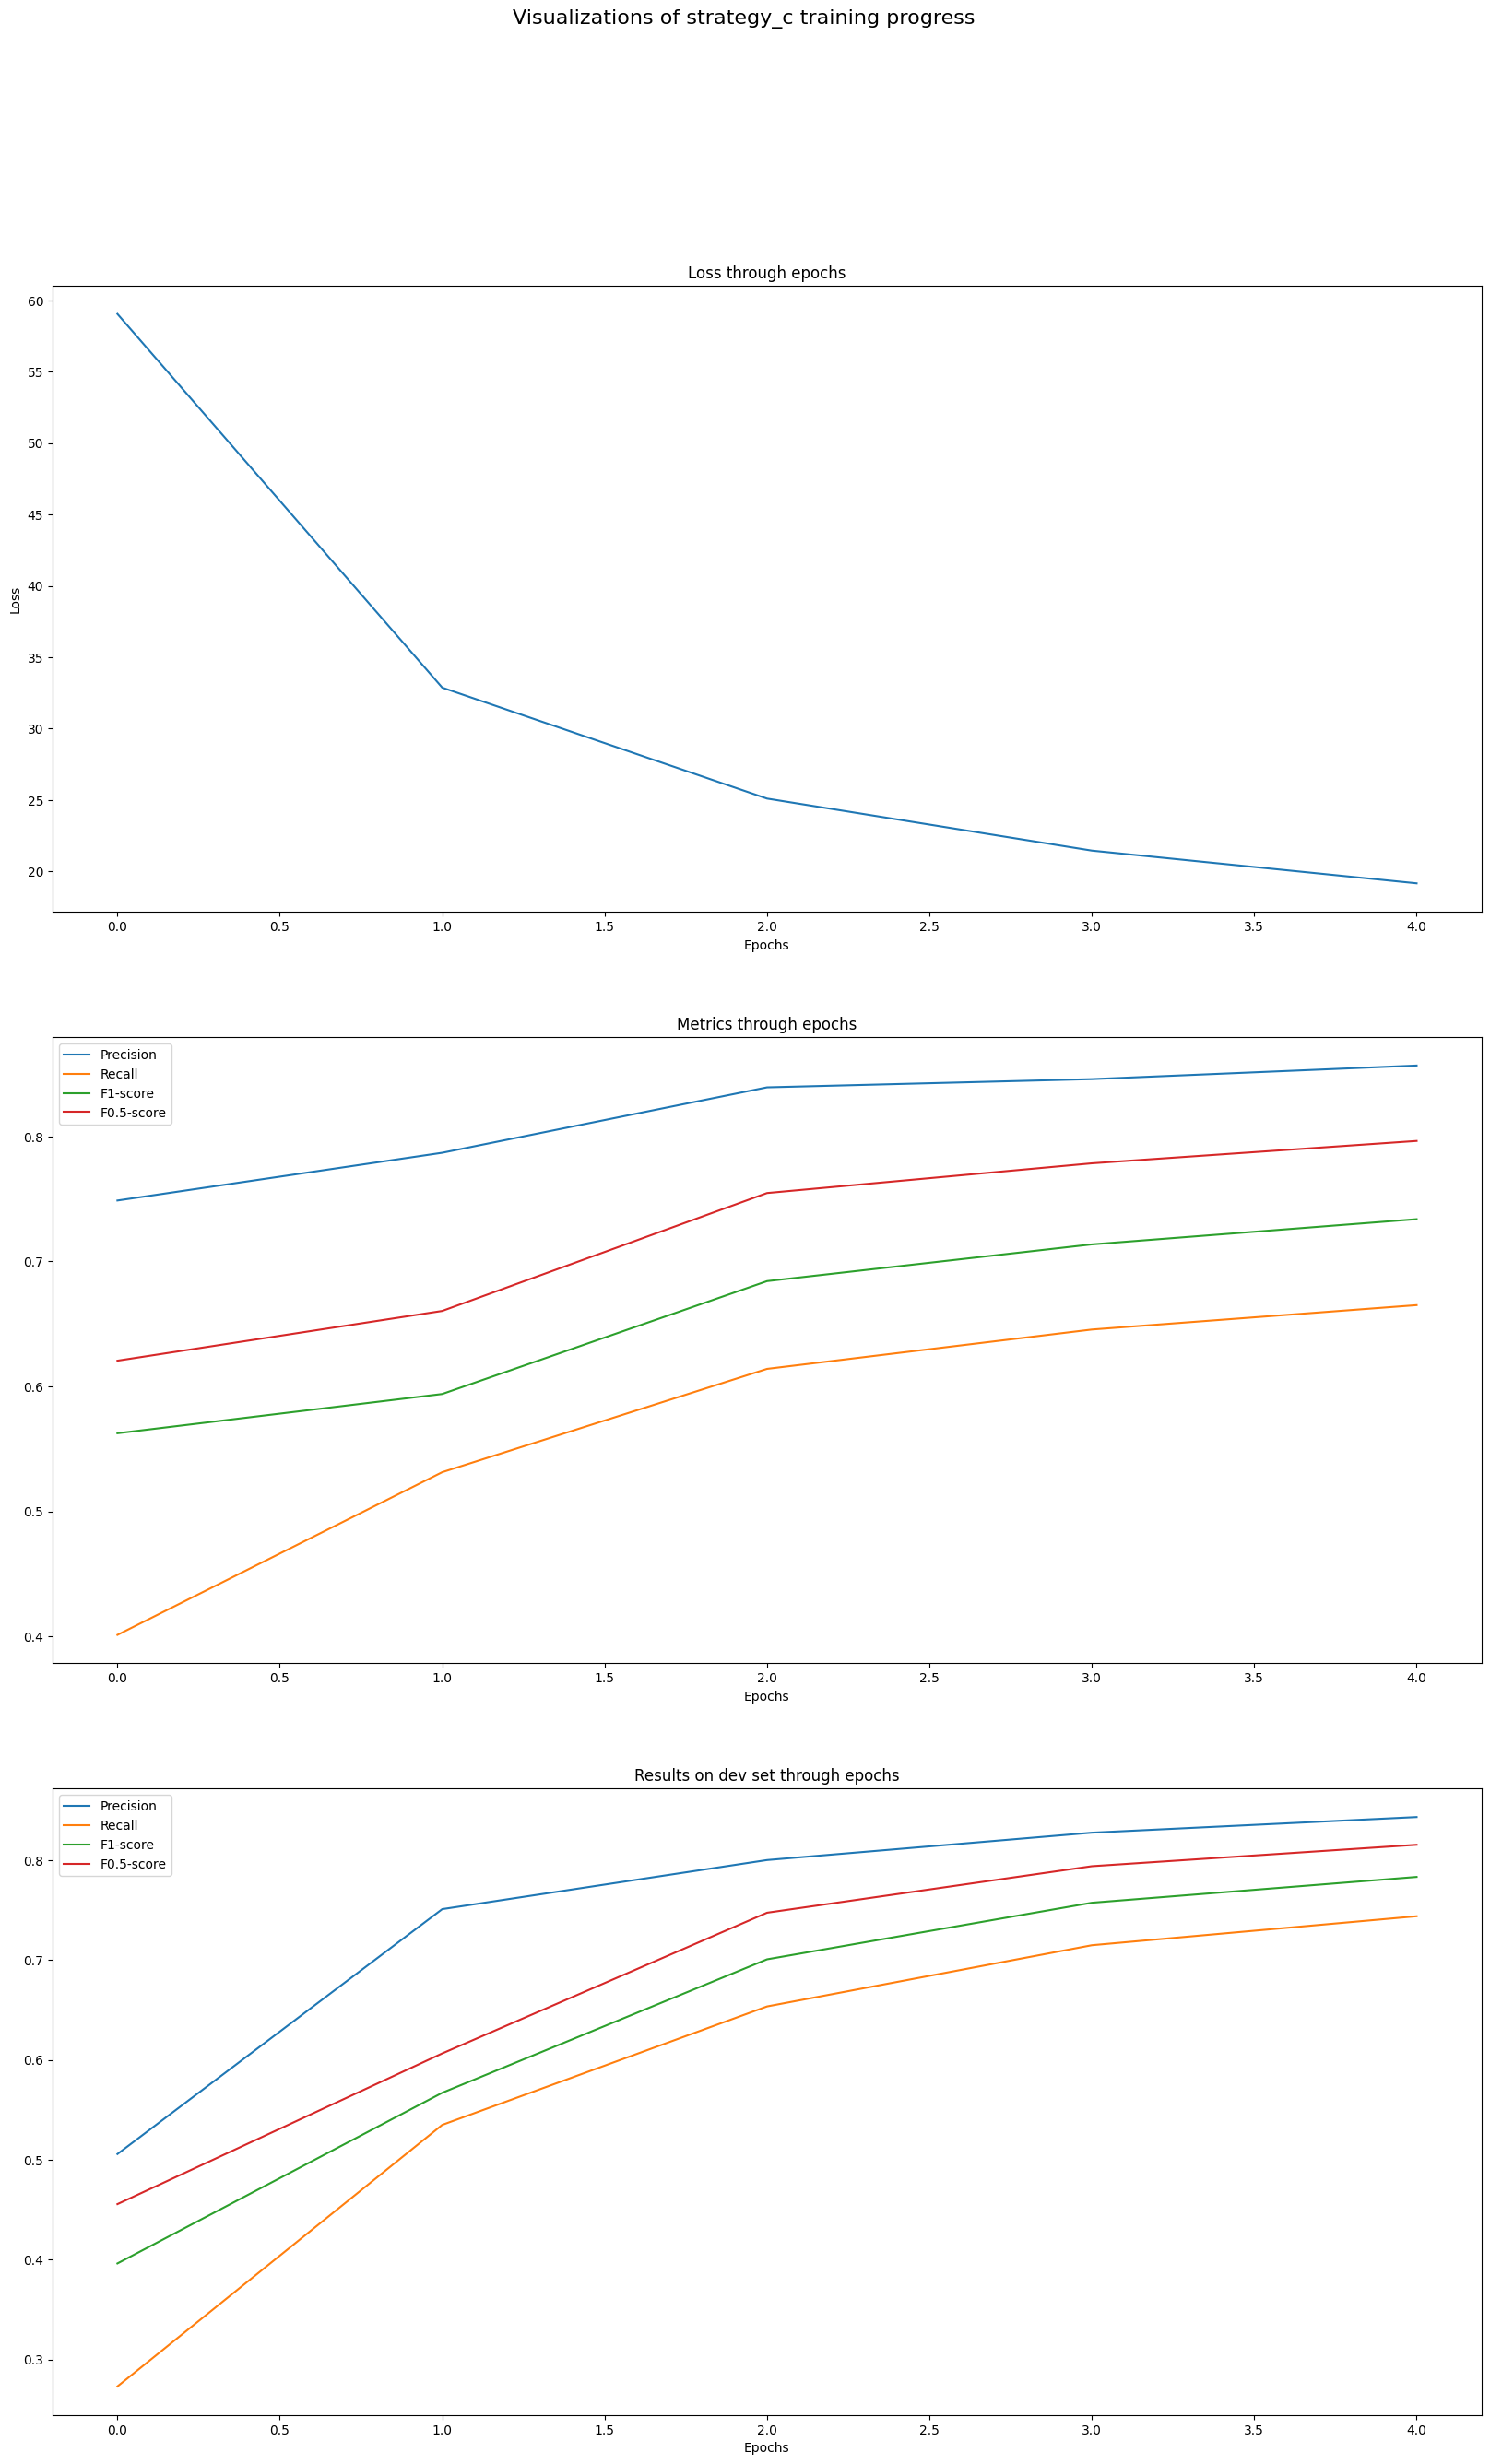

In [16]:
for name, plot_data in plotting_data.items():
    train, losses, valid = plot_data
    build_training_visualization(name, train, losses, valid, f'visualizations/{name}.png')

In [17]:
##Printing test set results
##TODO: Extract to scripts and merge with validate method

test_metrics = MetricsHandler(labels)

for name, model in models.items():
    print(f"{name} results on test set:")
    with torch.no_grad():
        inputs = torch.tensor(words_indexer.elements_to_index(test_words), dtype=torch.long)
        true_vals = tags_indexer.elements_to_index(test_tags)
        tag_scores = model(inputs)
        prediction = get_tag_indexes_from_scores(tag_scores)
        test_metrics.update(prediction, true_vals)
        test_metrics.collect()
        for metric in test_metrics.metrics_dict.keys():
            print(f"{metric} - {test_metrics.metrics_dict[metric][-1]}")
        print()

strategy_a results on test set:


/raid/data/tang/pytorch_ner/scripts/metrics.py:5: RuntimeWarning: invalid value encountered in scalar divide
  return x[1, 1]/(x[1, 1] + x[0, 1])
/raid/data/tang/pytorch_ner/scripts/metrics.py:9: RuntimeWarning: invalid value encountered in scalar divide
  return x[1, 1] / (x[1, 0] + x[1, 1])


Precision - 0.4725693472392866
Recall - 0.47099196660852183
F1-score - 0.4366080076475057
F0.5-score - 0.43514021445178774

strategy_b results on test set:
Precision - 0.809345378038444
Recall - 0.6166348301346023
F1-score - 0.6915646004570868
F0.5-score - 0.7547793092523026

strategy_c results on test set:
Precision - 0.8151943166572041
Recall - 0.6122632753329376
F1-score - 0.6901106348375505
F0.5-score - 0.7567049362503426

